## An investigation of the Brick Stacking Problem  

The original question I posed to myself is this. Can you stack bricks of equal dimensions and mass such that the top-most brick does not overlap the bottom-most brick? Or more generally, how far can bricks be stacked to generate the largest overhang? 

I pondered the problem and deliberately avoided finding solutions. I struggled through a few hand-calculations and hacked out a bit of python code to visualize my solution. 

The math of the problem is seemingly simple, just basic statics, but it becomes tricky as the problem is worked. We eventually find that the bricks stack according to a harmonic series!

$$ 
    overhang = \sum_{i=1}^{n} \frac{1}{2i} 
$$

OK, lets get started. First run the code to create the `brick_balance` function that accepts total bricks, length of brick and thickness of brick and let's explore the solutions.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys

def brick_balance(ntot=52, L=1, t=0.1):
    '''
    This program calcuates bricks stacked on one another to maximize overhang
    
    # number of bricks, minimum 2
    ntot = 7
    
    # length of brick
    L = 1
    
    # thickness of brick
    t = 0.15
    
    '''
    # force variables to be integers and floats
    ntot = int(ntot)
    L = float(L)
    t = float(t)
    
    plt.close('all')
    
    #overhang
    v = [1/(2*k) for k in range(ntot,0,-1)]
    #print('overhang=',v)
    
    x = [sum([k for k in v[0:n]]) for n in range(1,ntot+1)]
    #print('x location = ',x)
         
    x.insert(0,0)
    
    x = [x1*L for x1 in x]
    
    #y = arange(t/2,(ntot+1)*t,t)
    y = [z*t+t/2 for z in range(ntot+1)]
    
    # center of gravity
    C = sum(x[1:])/(ntot)
    
    maxoverhang = max(x)+L/2 - C 
    
    # plotting
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    for xi,yi in zip(x,y):
        ax2.add_patch(patches.Rectangle((xi-L/2, yi-t/2),L,t,fill=False))    
    plt.plot(x,y,'-o',[C,C],[0,max(y)],'--')
    plt.axis('equal')
    plt.title('n={}, L={}", t={}", max overhang={:0.2f}"'.format(ntot,L,t,maxoverhang))
    plt.ylabel('height, in')
    plt.show()

if __name__=='__main__':
    
    ## can use as a command line tool by uncommenting out the following 2 lines
    #user_args = sys.argv[1:]
    #n,L,t = user_args
    
    
    #brick_balance(ntot=4,L=1,t=0.1)
    
    print('brick_balance function created')

brick_balance function created


The simplest example is 2 bricks. Adults and children know that you cannot go more than half-way the length before the brick will topple off. For a brick of length 1 inch, the max overhang is 0.5 inches

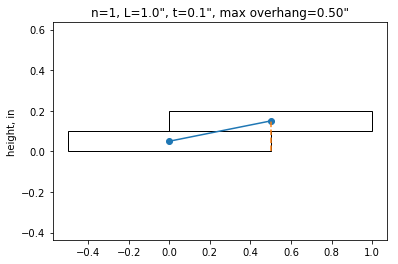

In [2]:
brick_balance(ntot=1, L=1, t=0.1)

So far so good. Now lets see if we can answer our question of if it is possible to allow the top brick to clear the bottom brick. After playing around the the total bricks, we arrive at 4 bricks. This solution is independent of brick length, thickness and weight! I thought this was very interesting!

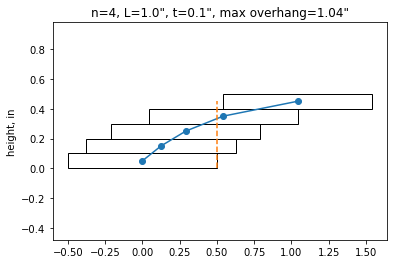

In [3]:
brick_balance(ntot=4, L=1, t=0.1)

Lastly, I was curious about how far you could theoretically overhang a deck of cards. Simply enter the parameters for a deck of cards, and voila, an overhang of nearly  8 inches! That was a bit mind-blowing.

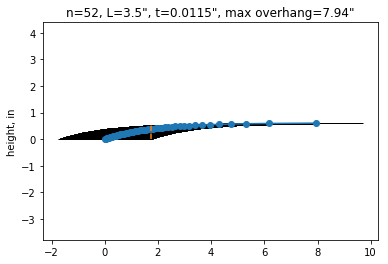

In [4]:
brick_balance(ntot=52, L=3.5, t=0.0115)

The python code was a handy was to explore this puzzle once the initial math was figured out, and once the plotting is figured out, can help debug the math and create neat visuals. Once I got the answer (and tried a few real blocks stacked and measured and compared to my calculated results), I started searching online and here are some resources I found. 

Quanta has a great article here about the problem https://www.quantamagazine.org/20161117-overhang-insights-puzzle/ with solution https://www.quantamagazine.org/20161202-overhang-puzzle-solution/  

Another explanation can be found here
http://datagenetics.com/blog/may32013/index.html and http://mathworld.wolfram.com/BookStackingProblem.html  

For more fun math puzzles, check out http://mathworld.wolfram.com/topics/Puzzles.html

Stay Curious!